## 1. Setting up environment

## 1.1 Load Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.tsa.stattools import ccf
import seaborn as sns
import plotly.express as px
import statsmodels.formula.api as smf
from scipy import stats
import scipy.stats as stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import date
import holidays
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1.2 Load Data

In [2]:
# load three dataset
train_data_raw = pd.read_csv("FinSalesPriceData_train.csv")
test_data_raw = pd.read_csv("FinSalesPriceData_test.csv")
competitor_data_raw = pd.read_csv("CompetitorPriceData.csv")

## 1.3 Make a copy of dataset

In [3]:
# make a copy of the data
train = train_data_raw.copy()
test = test_data_raw.copy()
competitor= competitor_data_raw.copy()

## 2. data processing
Goal:
* Discuss the joining process of data
* Dataset split
* Data cleaning & missing data management
* Data transformation
* Engineering featuring 

In [4]:
# find the datasets  basic features
train.head()

,calendar_day,article_id,article_desc,category,subcategory,segment,brand,brandtype,sell_price,promo_price,promo_sales,promo_units,gross_profit,scanback,sales_amount,sales_units,cnt_site_art_ranged,cnt_site_art_ranged_pstv_soh,tot_soh_ranged_sites,gst_flag
0,2022-02-07,196544,Skin Control Pimple Patch Micro Dart 9pk,Skin & Sun Care,Skincare Face,Other,SKIN CONTROL,National Brand,13.00,13.0,13.0,1,86.550,0.0,190.7080,15,176,171,1444.0,Y
1,2022-02-07,103515,Spascriptions Superfoods Masks 3x 50ml,Skin & Sun Care,Skincare Face,Masks,SPASCRIPTIONS,National Brand,20.00,NaN,NaN,0,28.719,0.0,59.7999,3,176,175,1907.0,Y
2,2022-02-07,103517,Spascriptions Retinol Facial Serum,Skin & Sun Care,Skincare Face,Masks,SPASCRIPTIONS,National Brand,18.00,NaN,NaN,0,17.158,0.0,35.8198,2,176,174,844.0,Y
3,2022-02-07,103518,Spascriptions Collagen Facial Serum,Skin & Sun Care,Skincare Face,Masks,SPASCRIPTIONS,National Brand,18.00,NaN,NaN,0,42.926,0.0,89.6396,5,176,174,938.0,Y
4,2022-02-07,103520,7th Heaven Blackhead Stardust Face Mask,Skin & Sun Care,Skincare Face,7Th Heaven,7TH HEAVEN,National Brand,6.95,NaN,NaN,0,16.919,0.0,41.5209,6,176,173,1960.0,Y


In [5]:
train.describe().round(2)

,article_id,sell_price,promo_price,promo_sales,promo_units,gross_profit,scanback,sales_amount,sales_units,cnt_site_art_ranged,cnt_site_art_ranged_pstv_soh,tot_soh_ranged_sites
count,1250017.00,1249543.00,241654.00,242466.00,1250017.00,1250017.00,1250017.00,1250017.00,1250017.00,1250017.00,1250017.00,1250017.00
mean,582393.54,15.34,9.57,447.78,10.11,54.17,22.76,275.14,27.08,128.82,117.44,1395.70
std,1314949.05,13.97,16.00,1053.48,37.39,180.78,128.92,846.27,62.79,75.61,76.94,1765.43
min,204.00,1.00,-2787.81,-3265.64,-24.00,-7212.75,-2254.35,-3301.20,-661.00,0.00,0.00,0.00
25%,138889.00,6.95,4.12,87.91,0.00,0.00,0.00,3.56,1.00,47.00,0.00,0.00
50%,253994.00,11.00,7.00,202.18,0.00,21.64,0.00,93.90,10.00,176.00,171.00,1182.00
75%,671548.00,19.00,12.01,409.41,0.00,66.73,0.00,244.80,31.00,176.00,175.00,1862.00
max,8393727.00,199.00,234.00,35324.06,1915.00,8801.13,33903.84,47786.29,5413.00,178.00,177.00,32228.00


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250017 entries, 0 to 1250016
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   calendar_day                  1250017 non-null  object 
 1   article_id                    1250017 non-null  int64  
 2   article_desc                  1250017 non-null  object 
 3   category                      1250017 non-null  object 
 4   subcategory                   1250017 non-null  object 
 5   segment                       1250017 non-null  object 
 6   brand                         1250017 non-null  object 
 7   brandtype                     1250017 non-null  object 
 8   sell_price                    1249543 non-null  float64
 9   promo_price                   241654 non-null   float64
 10  promo_sales                   242466 non-null   float64
 11  promo_units                   1250017 non-null  int64  
 12  gross_profit                

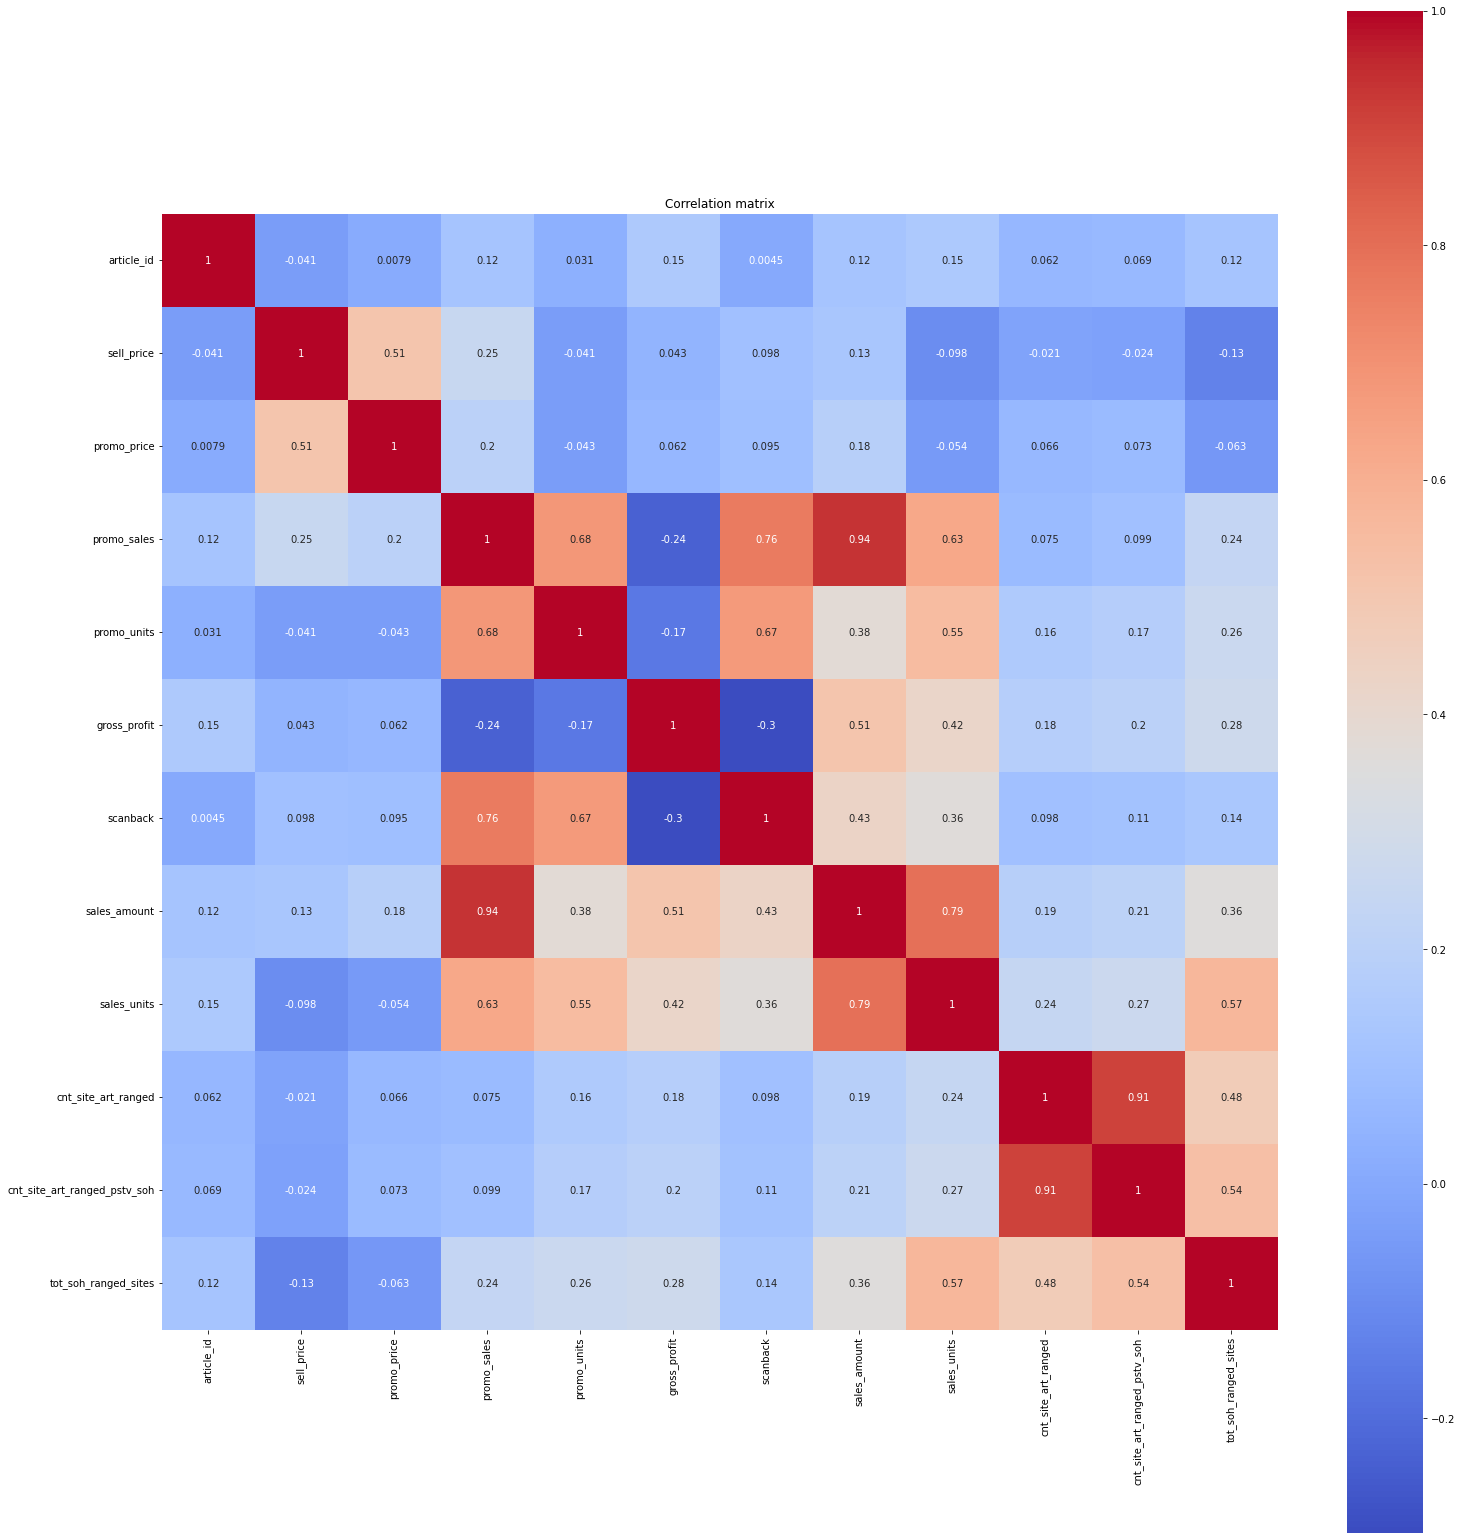

In [7]:
plt.subplots(figsize=(25,28))
sns.heatmap(train.corr(),square=True,annot=True,cmap="coolwarm")
plt.title('Correlation matrix')
plt.show()

In [8]:
test.head()

,calendar_day,article_id,article_desc,category,subcategory,segment,brand,brandtype,sell_price,promo_price,promo_sales,promo_units,gross_profit,scanback,sales_amount,sales_units,cnt_site_art_ranged,cnt_site_art_ranged_pstv_soh,tot_soh_ranged_sites,gst_flag
0,2023-05-26,201379,OralB 3DW Freshness Blast Toothpaste 95g,Personal Hygiene,Oral Care,Toothpaste,ORAL B,National Brand,16.0,NaN,NaN,0,42.081,0.00,95.5191,6,176,176,1644.0,Y
1,2023-05-26,198131,Oral B VitalityFlossAction ToothBrush,Personal Hygiene,Oral Care,Power Toothbrushes,ORAL B,National Brand,50.0,24.13,24.128,1,119.244,13.62,497.7414,11,176,174,696.0,Y
2,2023-05-26,198121,Oral B Kids Paste Spiderman 92g,Personal Hygiene,Oral Care,Kids,ORAL B,National Brand,3.5,NaN,NaN,0,29.530,0.00,82.3720,24,176,176,2260.0,Y
3,2023-05-26,198120,Oral B 3D White Refill 3pk,Personal Hygiene,Oral Care,Power Brush Heads,ORAL B,National Brand,30.0,NaN,NaN,0,-11.178,0.00,67.2192,5,176,48,263.0,Y
4,2023-05-26,197043,COLGATE ADV TEETH WHITENG TPASTE 200G,Personal Hygiene,Oral Care,Toothpaste,COLGATE,National Brand,10.0,0.01,0.025,5,139.798,11.20,458.3698,53,176,176,10368.0,Y


In [9]:
test.describe().round(2)

,article_id,sell_price,promo_price,promo_sales,promo_units,gross_profit,scanback,sales_amount,sales_units,cnt_site_art_ranged,cnt_site_art_ranged_pstv_soh,tot_soh_ranged_sites
count,605777.00,605547.00,123884.00,124350.00,605777.00,605777.00,605777.00,605777.00,605777.00,605777.00,605777.00,605777.00
mean,582230.93,15.93,10.69,476.74,10.48,51.59,27.25,279.56,25.99,127.52,120.09,1304.24
std,1314667.32,14.50,10.94,1121.21,37.27,173.80,154.32,824.32,57.00,76.46,76.45,1617.46
min,204.00,1.50,-337.39,-1925.90,-24.00,-7978.58,-229.32,-599.00,-21.00,0.00,0.00,0.00
25%,138889.00,7.00,4.24,89.90,0.00,0.00,0.00,6.55,1.00,14.00,0.00,0.00
50%,253606.00,11.95,7.49,217.54,0.00,23.48,0.00,99.50,10.00,176.00,171.00,1111.00
75%,671548.00,20.00,13.30,445.25,0.00,68.09,0.00,254.61,29.00,176.00,175.00,1768.00
max,8393727.00,199.00,540.01,32125.12,1803.00,6189.90,16068.78,34209.04,2196.00,178.00,178.00,32107.00


## 2.1 Data joining process

In [10]:
competitor.head()

,article_id,fiscal_week_start_date,competitor,competitor_shelf_price,competitor_total_price
0,101453,2024-02-05,Chemist Warehouse,7.20,4.99
1,101453,2024-02-05,Woolworths,7.20,7.20
2,101697,2024-02-05,Chemist Warehouse,3.99,3.49
3,101697,2024-02-05,Woolworths,4.00,3.20
4,101930,2024-02-05,Chemist Warehouse,134.95,89.99


In [11]:
competitor.describe().round(2)

,article_id,competitor_shelf_price,competitor_total_price
count,84510.00,84510.00,84510.00
mean,502431.80,16.19,13.57
std,992555.25,17.44,13.16
min,722.00,1.00,1.00
25%,151843.00,7.00,5.60
50%,271284.00,11.99,9.99
75%,687232.00,19.98,17.00
max,8361376.00,579.00,449.99


In [12]:
competitor['competitor'].value_counts()

Woolworths           44870
Coles                16289
Chemist Warehouse    15970
Kmart                 5548
Target                1833
Name: competitor, dtype: int64

In [13]:
competitor['article_id'].value_counts()

567622    183
205926    182
188405    182
567595    182
26807     181
         ... 
278323      1
170313      1
138037      1
166192      1
203779      1
Name: article_id, Length: 1413, dtype: int64

In [14]:
competitor['fiscal_week_start_date'] = pd.to_datetime(competitor['fiscal_week_start_date'])
competitor['fiscal_week_start_date'].value_counts()

2024-02-05    1910
2024-01-29    1908
2023-12-11    1903
2023-11-20    1893
2024-01-15    1891
2023-12-25    1888
2023-12-18    1884
2023-12-04    1882
2024-01-22    1880
2024-01-01    1876
2023-10-23    1875
2024-01-08    1854
2023-10-16    1852
2023-11-13    1848
2023-11-06    1807
2023-10-09    1797
2023-09-25    1797
2023-11-27    1793
2023-10-02    1793
2023-10-30    1781
2023-09-18    1760
2023-09-11    1752
2023-09-04    1744
2023-08-28    1708
2023-08-14    1658
2023-07-24    1556
2023-07-31    1549
2023-08-07    1547
2023-08-21    1545
2023-06-26    1498
2023-06-19    1486
2023-07-03    1479
2023-07-10    1463
2023-05-29    1460
2023-07-17    1460
2023-06-12    1456
2023-05-15    1451
2023-06-05    1441
2023-05-22    1439
2023-04-10    1439
2023-04-17    1438
2023-03-27    1430
2023-05-01    1425
2023-03-20    1423
2023-04-24    1422
2023-04-03    1421
2023-05-08    1421
2023-02-27    1362
2023-03-06    1339
2023-02-13    1323
2023-03-13    1315
2023-02-20    1188
Name: fiscal

In [15]:
competitor.isnull().sum()

article_id                0
fiscal_week_start_date    0
competitor                0
competitor_shelf_price    0
competitor_total_price    0
dtype: int64

In [16]:
competitor.rename(columns={'fiscal_week_start_date': 'calendar_day'}, inplace=True)

In [17]:
competitor.head()

,article_id,calendar_day,competitor,competitor_shelf_price,competitor_total_price
0,101453,2024-02-05,Chemist Warehouse,7.20,4.99
1,101453,2024-02-05,Woolworths,7.20,7.20
2,101697,2024-02-05,Chemist Warehouse,3.99,3.49
3,101697,2024-02-05,Woolworths,4.00,3.20
4,101930,2024-02-05,Chemist Warehouse,134.95,89.99


In [18]:
competitor.describe().round(2)

,article_id,competitor_shelf_price,competitor_total_price
count,84510.00,84510.00,84510.00
mean,502431.80,16.19,13.57
std,992555.25,17.44,13.16
min,722.00,1.00,1.00
25%,151843.00,7.00,5.60
50%,271284.00,11.99,9.99
75%,687232.00,19.98,17.00
max,8361376.00,579.00,449.99


## 2.2 Dataset split

In [19]:
train_idx, val_idx = train_test_split(train.index, test_size=0.2, random_state=3600)
train = train_data_raw.loc[train_idx]
val = train_data_raw.loc[val_idx]

print(train.shape)
print(val.shape)
print(test.shape)


(1000013, 20)
(250004, 20)
(605777, 20)


## 2.3 Data cleaning & missing data manegament

### 2.3.1 Missing data management

In [20]:
train_data_raw.isnull().sum()

calendar_day                          0
article_id                            0
article_desc                          0
category                              0
subcategory                           0
segment                               0
brand                                 0
brandtype                             0
sell_price                          474
promo_price                     1008363
promo_sales                     1007551
promo_units                           0
gross_profit                          0
scanback                              0
sales_amount                          0
sales_units                           0
cnt_site_art_ranged                   0
cnt_site_art_ranged_pstv_soh          0
tot_soh_ranged_sites                  0
gst_flag                              0
dtype: int64

In [21]:
# the missing value percentage
(train_data_raw.isnull().sum()/(len(train_data_raw)))*100

calendar_day                     0.000000
article_id                       0.000000
article_desc                     0.000000
category                         0.000000
subcategory                      0.000000
segment                          0.000000
brand                            0.000000
brandtype                        0.000000
sell_price                       0.037919
promo_price                     80.667943
promo_sales                     80.602984
promo_units                      0.000000
gross_profit                     0.000000
scanback                         0.000000
sales_amount                     0.000000
sales_units                      0.000000
cnt_site_art_ranged              0.000000
cnt_site_art_ranged_pstv_soh     0.000000
tot_soh_ranged_sites             0.000000
gst_flag                         0.000000
dtype: float64

In [22]:
nan = train_data_raw[train_data_raw["article_id"] == 695147]
nan

,calendar_day,article_id,article_desc,category,subcategory,segment,brand,brandtype,sell_price,promo_price,promo_sales,promo_units,gross_profit,scanback,sales_amount,sales_units,cnt_site_art_ranged,cnt_site_art_ranged_pstv_soh,tot_soh_ranged_sites,gst_flag
600,2022-02-07,695147,Dettol Antbac Rfhw 950ML Rfrefreshhw,Personal Hygiene,Soaps & Wash,Hand Soap,DETTOL,National Brand,NaN,NaN,NaN,0,2.900,0.0,6.5000,1,0,0,0.0,Y
3236,2022-02-08,695147,Dettol Antbac Rfhw 950ML Rfrefreshhw,Personal Hygiene,Soaps & Wash,Hand Soap,DETTOL,National Brand,NaN,NaN,NaN,0,0.000,0.0,0.0000,0,0,0,0.0,Y
5876,2022-02-09,695147,Dettol Antbac Rfhw 950ML Rfrefreshhw,Personal Hygiene,Soaps & Wash,Hand Soap,DETTOL,National Brand,NaN,NaN,NaN,0,0.000,0.0,0.0000,0,0,0,0.0,Y
8512,2022-02-10,695147,Dettol Antbac Rfhw 950ML Rfrefreshhw,Personal Hygiene,Soaps & Wash,Hand Soap,DETTOL,National Brand,NaN,NaN,NaN,0,0.000,0.0,0.0000,0,0,0,0.0,Y
11150,2022-02-11,695147,Dettol Antbac Rfhw 950ML Rfrefreshhw,Personal Hygiene,Soaps & Wash,Hand Soap,DETTOL,National Brand,NaN,NaN,NaN,0,2.353,0.0,12.9403,2,0,0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237819,2023-05-22,695147,Dettol Antbac Rfhw 950ML Rfrefreshhw,Personal Hygiene,Soaps & Wash,Hand Soap,DETTOL,National Brand,NaN,NaN,NaN,0,0.000,0.0,0.0000,0,0,0,0.0,Y
1240354,2023-05-23,695147,Dettol Antbac Rfhw 950ML Rfrefreshhw,Personal Hygiene,Soaps & Wash,Hand Soap,DETTOL,National Brand,NaN,NaN,NaN,0,0.000,0.0,0.0000,0,0,0,0.0,Y
1243095,2023-05-24,695147,Dettol Antbac Rfhw 950ML Rfrefreshhw,Personal Hygiene,Soaps & Wash,Hand Soap,DETTOL,National Brand,NaN,NaN,NaN,0,0.000,0.0,0.0000,0,0,0,0.0,Y
1245733,2023-05-25,695147,Dettol Antbac Rfhw 950ML Rfrefreshhw,Personal Hygiene,Soaps & Wash,Hand Soap,DETTOL,National Brand,NaN,NaN,NaN,0,0.000,0.0,0.0000,0,0,0,0.0,Y


In [23]:
# function that process the selling price data
def missing_sell_price(data):
    # Calculate NA sell price using sales amount / sales units
    data['sell_price'] = data['sell_price'].fillna(data['sales_amount']/data['sales_units'])
    # Use previous sell price of no sales amount
    data['sell_price'] = data['sell_price'].fillna(method='ffill')
    return data

# function that process missing promo price and promo sales
def missing_promo(data):
    for idx in data.index:
        if pd.isna(data['promo_price'][idx]) and pd.notna(data['promo_sales'][idx]):
            data['promo_sales'][idx] = np.nan
    return data

In [24]:
train = missing_sell_price(train)
train = missing_promo(train)

val = missing_sell_price(val)
val = missing_promo(val)

test = missing_sell_price(test)
test = missing_promo(test)

In [25]:
print(train.shape)
print(val.shape)
print(test.shape)

(1000013, 20)
(250004, 20)
(605777, 20)


### 2.3.2 Inconsistencies and Anomalies
* Negative Sell Price, Promotion Price, Promotional Sales, and Scanback
* Availability Issues
* Invalid Sales (Sales Units and Promotional Units)
* Duplicates
* Promo Price higher and equal to Sell Price
* Drop Inventory Features

In [26]:
# function that drop negative promotion negative, negative sell price
def drop_neg_invalid_rows(data):
    data = data.drop(data[data['promo_price'] < 0].index)
    data = data.drop(data[data['promo_sales'] < 0].index)
    data = data.drop(data[data['scanback'] < 0].index)
    data = data.drop(data[data['sell_price'] < 0].index)
    return data

data_train = drop_neg_invalid_rows(train)
data_val = drop_neg_invalid_rows(val)
data_test = drop_neg_invalid_rows(test)

print(data_train.shape)
print(data_val.shape)
print(data_test.shape)

(997831, 20)
(249465, 20)
(604344, 20)


In [27]:
# function that drop rows with availability issues
def rm_availability_issue(data):
    condition = data[(data['cnt_site_art_ranged'] > 0) & (data['tot_soh_ranged_sites'] == 0)]
    data = data.drop(condition.index)
    return data

data_train = rm_availability_issue(data_train)
data_val = rm_availability_issue(data_val)
data_test = rm_availability_issue(data_test)

print(data_train.shape)
print(data_val.shape)
print(data_test.shape)

(972425, 20)
(243254, 20)
(596838, 20)


In [28]:
# function that drop rows where promo units or sales units are more than stock
def drop_sell_more_than_stock(data):
    data = data.drop(data[data['sales_units'] > data['tot_soh_ranged_sites']].index)
    data = data.drop(data[data['promo_units'] > data['tot_soh_ranged_sites']].index)
    return data

data_train = drop_sell_more_than_stock(data_train)
data_val = drop_sell_more_than_stock(data_val)
data_test = drop_sell_more_than_stock(data_test)

print(data_train.shape)
print(data_val.shape)
print(data_test.shape)

(919962, 20)
(230080, 20)
(562224, 20)


In [29]:
# function that remove duplicates
def remove_duplicates(data):
    duplicate = data.duplicated()
    data = data.drop(data[duplicate].index)
    return data

data_train = remove_duplicates(data_train)
data_val = remove_duplicates(data_val)
data_test = remove_duplicates(data_test)

print(data_train.shape)
print(data_val.shape)
print(data_test.shape)

(919962, 20)
(230080, 20)
(562224, 20)


In [30]:
def remove_invalid_promo(data):
    data = data.drop(data[(data['promo_price'] >= data['sell_price'])].index)
    return data

data_train = remove_invalid_promo(data_train)
data_val = remove_invalid_promo(data_val)
data_test = remove_invalid_promo(data_test)

print(data_train.shape)
print(data_val.shape)
print(data_test.shape)

(919146, 20)
(229874, 20)
(561534, 20)


## 2.4 Data transformation

### Delete inventory feature from dataset due to data leakage

In [31]:
data_train = data_train.drop(['cnt_site_art_ranged', 'cnt_site_art_ranged_pstv_soh', 'tot_soh_ranged_sites'], axis=1)
data_val = data_val.drop(['cnt_site_art_ranged', 'cnt_site_art_ranged_pstv_soh', 'tot_soh_ranged_sites'], axis=1)
data_test = data_test.drop(['cnt_site_art_ranged', 'cnt_site_art_ranged_pstv_soh', 'tot_soh_ranged_sites'], axis=1)


In [32]:
def cat_to_dum(data, var_name):
    category_dummies = pd.get_dummies(data[var_name], prefix=var_name)
    data = pd.concat([data, category_dummies], axis=1)
    data = data.drop(var_name, axis=1)
    return data
    
def data_type_transform(data):
    # find the categorical columns
    cat_columns = data.select_dtypes(include=['object']).columns
    
    # transform calendar_day to datetime object
    data['calendar_day'] = pd.to_datetime(data['calendar_day'])
    
    # transform category to dummy
    data = cat_to_dum(data, 'category')
    
    # transform sub_category to dummy
    data = cat_to_dum(data, 'subcategory')
    
    # transform segment to dummy
    data = cat_to_dum(data, 'segment')
    
    # transform brand to dummy
    data = cat_to_dum(data, 'brand')
    
    # transform brandtype to dummy
    data = cat_to_dum(data, 'brandtype')
    
    # transform gst to dummy
    data = cat_to_dum(data, 'gst_flag')

    return data

In [33]:
data_train_with_dummy = data_train.copy()
data_train_with_dummy = data_type_transform(data_train_with_dummy)

data_val_with_dummy = data_val.copy()
data_test_with_dummy = data_test.copy()

data_val_with_dummy = data_type_transform(data_val_with_dummy)
data_test_with_dummy = data_type_transform(data_test_with_dummy)

In [34]:
print(data_train_with_dummy.shape)
print(data_val_with_dummy.shape)
print(data_test_with_dummy.shape)

(919146, 413)
(229874, 413)
(561534, 413)


## 2.5 Engineer featuring
### 2.5.1 Adding new variables
* Revised profits: net_proft = gross_profit + scanback

* Cost of purchasing: 2.1 if GST is present: sales_amount_exclude_gst = sales_amount / 1.1 2.2; if GST is absent: sales_amount_exclude_gst = sales_amount cost_of_purchasing = sales_amount_exclude_gst - net_profit

* Sales units per dollar decrease to see the price elasticity of the article: sales_units_per_dollar = promo_units / (selling_price - promo_price)

* Day of Week day_of_week = date.dt.dayofweek

* Whether the article is on promotion (0 for no, 1 for yes)

In [35]:
def new_var(data):
    # Calculate revised net profit
    data['net_profit'] = data['gross_profit'] + data['scanback']
    
    # Calculate sales amount excluding GST using vectorized operation
    data['sales_amount_exclude_gst'] = data['sales_amount'] / (1.1 if 'gst_flag_Y' in data.columns and data['gst_flag_Y'].all() else 1)
    
    # Calculate cost of purchasing
    data['cost_of_purchasing'] = data['sales_amount_exclude_gst'] - data['net_profit']
    
    # Calculate sales units per dollar decrease due to promotions
    data['marginal_sales_per_dollar_decrease'] = data['promo_units'] / (data['sell_price'] - data['promo_price'])
    
    # Extract day of week from 'calendar_day'
    data['day_of_week'] = data['calendar_day'].dt.dayofweek
    ## treat day_of_week as categorical
    data = cat_to_dum(data, 'day_of_week')
    
    # Identify whether the article is on promotion
    data['on_promo'] = data['promo_price'].apply(lambda x: 1 if x > 0 else 0)
    ## change on_promo to bool
    data['on_promo'] = data['on_promo'].astype(bool)
    
    return data

data_train_with_dummy = new_var(data_train_with_dummy)
data_val_with_dummy = new_var(data_val_with_dummy)
data_test_with_dummy = new_var(data_test_with_dummy)

In [36]:
print(data_train_with_dummy.shape)
print(data_val_with_dummy.shape)
print(data_test_with_dummy.shape)

(919146, 425)
(229874, 425)
(561534, 425)


### 2.5.2 Standardisation

In [37]:
# Split into normal and promotional data
def normal_promo_sets(data):
    return data[data["promo_price"].isna()], data[data["promo_price"].notna()]

# Split data into Normal Sales and Promo Sales
train_normal, train_promo = normal_promo_sets(data_train_with_dummy)
test_normal, test_promo = normal_promo_sets(data_test_with_dummy)
val_normal, val_promo = normal_promo_sets(data_val_with_dummy)

# check shape
print(train_normal.shape)
print(train_promo.shape)
print(test_normal.shape)
print(test_promo.shape)
print(val_normal.shape)
print(val_promo.shape)

(733589, 425)
(185557, 425)
(441888, 425)
(119646, 425)
(183182, 425)
(46692, 425)


In [38]:
# Standardise the data
# check numerical columns
train_normal.select_dtypes(include=['int', 'float']).columns

# colns that have na values for normal sales
print(train_normal.columns[train_normal.isna().any()])

# colns that have na values for promo sales
print(train_promo.columns[train_promo.isna().any()])
print(train_promo.columns[train_promo.isin([np.nan, np.inf, -np.inf]).any()])
print(train_promo['marginal_sales_per_dollar_decrease'].value_counts())

Index(['promo_price', 'promo_sales', 'marginal_sales_per_dollar_decrease'], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
2.000000      573
4.000000      503
1.000000      483
0.666667      421
1.333333      396
             ... 
56.787330       1
22.096317       1
20.487805       1
0.804598        1
489.189189      1
Name: marginal_sales_per_dollar_decrease, Length: 57978, dtype: int64


In [39]:
def prepare_for_std(data, promo=False):
    # rm the columns that are misclassified as numerical
    data['article_id'] = data_train_with_dummy['article_id'].astype(str)
    
    # consider two cases: normal sales and promo sales
    ## for normal sales drop promo columns
    if promo == False:
        data = data.drop(['promo_price', 'promo_sales', 'marginal_sales_per_dollar_decrease'], axis=1)
    return data

train_normal = prepare_for_std(train_normal)
train_promo = prepare_for_std(train_promo, promo=True)
val_normal = prepare_for_std(val_normal)
val_promo = prepare_for_std(val_promo, promo=True)
test_normal = prepare_for_std(test_normal)
test_promo = prepare_for_std(test_promo, promo=True)

# check shape
print(train_normal.shape)
print(train_promo.shape)
print(val_normal.shape)
print(val_promo.shape)
print(test_normal.shape)
print(test_promo.shape)

(733589, 422)
(185557, 425)
(183182, 422)
(46692, 425)
(441888, 422)
(119646, 425)


In [40]:
# Split data into x features and y target
def y_x_split(data):
    return data["sales_units"], data.drop("sales_units", axis =1)

# Split data into x and y sets
y_train_normal, x_train_normal = y_x_split(train_normal)
y_train_promo, x_train_promo = y_x_split(train_promo)

y_test_normal, x_test_normal = y_x_split(test_normal)
y_test_promo, x_test_promo = y_x_split(test_promo)

y_val_normal, x_val_normal = y_x_split(val_normal)
y_val_promo, x_val_promo = y_x_split(val_promo)

# check shape
print(y_train_normal.shape)
print(x_train_normal.shape)
print(y_train_promo.shape)
print(x_train_promo.shape)

print(y_test_normal.shape)
print(x_test_normal.shape)
print(y_test_promo.shape)
print(x_test_promo.shape)

print(y_val_normal.shape)
print(x_val_normal.shape)
print(y_val_promo.shape)
print(x_val_promo.shape)

(733589,)
(733589, 421)
(185557,)
(185557, 424)
(441888,)
(441888, 421)
(119646,)
(119646, 424)
(183182,)
(183182, 421)
(46692,)
(46692, 424)


In [41]:
def promo_unit_per_dollar(data):
    # calculate the promo unit per dollar decrease
    pos_promo_units = data['promo_units'] > 0
    
    # change in price and promo units
    diff_price = data.loc[pos_promo_units, 'sell_price'] - data.loc[pos_promo_units, 'promo_price']
    diff_units = data.loc[pos_promo_units, 'promo_units']
    
    # new feature
    data['promo_unit_per_dollar'] = np.nan
    data.loc[pos_promo_units, 'promo_unit_per_dollar'] = diff_units / diff_price

    return data
    
# train dataset
data_train = promo_unit_per_dollar(data_train)
# test dataset
data_test = promo_unit_per_dollar(data_test)

data_train.head()

,calendar_day,article_id,article_desc,category,subcategory,segment,brand,brandtype,sell_price,promo_price,promo_sales,promo_units,gross_profit,scanback,sales_amount,sales_units,gst_flag,promo_unit_per_dollar
161977,2022-04-09,27053,Nivea Creme Soft Jojoba/vit E 75ml,Skin & Sun Care,Skincare Face,Nivea,NIVEA,National Brand,5.50,NaN,NaN,0,39.409,0.0,109.3029,20,Y,NaN
901618,2023-01-14,574782,Oral B Kids Power Brush Heads 2Pk,Personal Hygiene,Oral Care,Kids,ORAL B,National Brand,15.00,NaN,NaN,0,39.022,0.0,104.7192,7,Y,NaN
368078,2022-06-26,237922,Sabco Tile and Grout Brush,Household Cleaning,Brooms & Brushes,Scrub Brush,SABCO,National Brand,4.75,NaN,NaN,0,0.000,0.0,0.0000,0,Y,NaN
62227,2022-03-02,692484,Duck Fresh Discs Ltd Edition 36ml,Household Cleaning,Cleaning Products,Bathroom,DUCK,Manufacturer Brand,6.25,NaN,NaN,0,75.277,0.0,215.1347,35,Y,NaN
358737,2022-06-22,63878,Earth Choice Wool Wash 1l,Household Cleaning,Prewash & Conditio,Wool Wash,EARTH CHOICE,National Brand,2.60,NaN,NaN,0,0.000,0.0,0.0000,0,Y,NaN


In [42]:
data_train['promo_unit_per_dollar'].describe()

count    185557.000000
mean         30.012104
std          62.284017
min           0.010049
25%           2.142857
50%           8.774978
75%          30.735931
max        2800.000000
Name: promo_unit_per_dollar, dtype: float64

In [43]:
# find the most elastic product
max_index = data_train['promo_unit_per_dollar'].idxmax()
row_with_max_value = data_train.iloc[max_index]

print("Row with maximum value in 'promo_unit_per_dollar' column:")
print(row_with_max_value)

Row with maximum value in 'promo_unit_per_dollar' column:
calendar_day                                        2022-05-04
article_id                                              137856
article_desc             Spascriptions Collagen Sheet Mask 5pk
category                                       Skin & Sun Care
subcategory                                      Skincare Face
segment                                                  Masks
brand                                            SPASCRIPTIONS
brandtype                                       National Brand
sell_price                                                10.0
promo_price                                               6.98
promo_sales                                           174.5345
promo_units                                                 25
gross_profit                                            48.269
scanback                                                 45.25
sales_amount                                          172.91

In [44]:
filtered_data = data_train[data_train['promo_unit_per_dollar'] != 0]

if not filtered_data.empty:
    min_value = filtered_data['promo_unit_per_dollar'].min()
    row_with_min_value = filtered_data[filtered_data['promo_unit_per_dollar'] == min_value]
    print("Row with minimum value in 'promo_unit_per_dollar' column (excluding 0):")
    print(row_with_min_value)
else:
    print("No non-zero values found in 'promo_unit_per_dollar' column.")

Row with minimum value in 'promo_unit_per_dollar' column (excluding 0):
        calendar_day  article_id                              article_desc  \
1097457   2023-03-30      258147  iO 3 Matte Blk +1 Ult Clean Black Refill   

                 category subcategory             segment   brand  \
1097457  Personal Hygiene   Oral Care  Power Toothbrushes  ORAL B   

              brandtype  sell_price  promo_price  promo_sales  promo_units  \
1097457  National Brand       199.0        99.49       99.494            1   

         gross_profit  scanback  sales_amount  sales_units gst_flag  \
1097457        -16.67     55.22          99.5            1        Y   

         promo_unit_per_dollar  
1097457               0.010049  


In [45]:
# find the most inelastic product
min_index = data_train[data_train['promo_unit_per_dollar'] != 0]['promo_unit_per_dollar'].idxmin()
row_with_min_value = data_train.loc[min_index]

attributes = [
    ("Calendar Day", row_with_min_value['calendar_day']),
    ("Article ID", row_with_min_value['article_id']),
    ("Article Desc", row_with_min_value['article_desc']),
    ("Category", row_with_min_value['category']),
    ("Subcategory", row_with_min_value['subcategory']),
    ("Segment", row_with_min_value['segment']),
    ("Brand", row_with_min_value['brand']),
    ("Brand Type", row_with_min_value['brandtype']),
    ("Sell Price", row_with_min_value['sell_price']),
    ("Promo Price", row_with_min_value['promo_price']),
    ("Promo Sales", row_with_min_value['promo_sales']),
    ("Promo Units", row_with_min_value['promo_units']),
    ("Gross Profit", row_with_min_value['gross_profit']),
    ("Scanback", row_with_min_value['scanback']),
    ("Sales Amount", row_with_min_value['sales_amount']),
    ("Sales Units", row_with_min_value['sales_units']),
    ("GST Flag", row_with_min_value['gst_flag']),
    ("Promo Unit Per Dollar", row_with_min_value['promo_unit_per_dollar'])
]

# Print the row in a formatted table
print("Row with minimum value in 'promo_unit_per_dollar' column (excluding 0):")
print("--------------------------------")
for attribute, value in attributes:
    print("| {:<20} | {:>10} |".format(attribute, value))
print("--------------------------------")


Row with minimum value in 'promo_unit_per_dollar' column (excluding 0):
--------------------------------
| Calendar Day         | 2023-03-30 |
| Article ID           |     258147 |
| Article Desc         | iO 3 Matte Blk +1 Ult Clean Black Refill |
| Category             | Personal Hygiene |
| Subcategory          |  Oral Care |
| Segment              | Power Toothbrushes |
| Brand                |     ORAL B |
| Brand Type           | National Brand |
| Sell Price           |      199.0 |
| Promo Price          |      99.49 |
| Promo Sales          |     99.494 |
| Promo Units          |          1 |
| Gross Profit         |     -16.67 |
| Scanback             |      55.22 |
| Sales Amount         |       99.5 |
| Sales Units          |          1 |
| GST Flag             |          Y |
| Promo Unit Per Dollar | 0.010049241282283187 |
--------------------------------


### 2.5.2 descriptive statistics

In [46]:
data_train['sales_units'].describe().round(2)

count    919146.00
mean         29.03
std          64.74
min        -661.00
25%           1.00
50%          12.00
75%          33.00
max        5413.00
Name: sales_units, dtype: float64

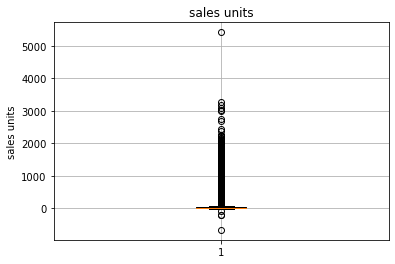

In [47]:
# boxplot:
y = data_train['sales_units']
plt.boxplot(y)
plt.title('sales units')
plt.ylabel('sales units')
plt.grid(True)
plt.show()


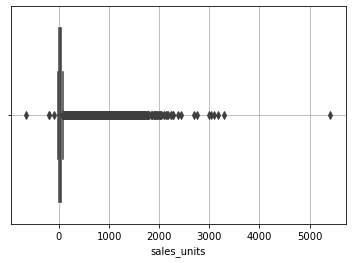

In [48]:
# boxplot 2
y = data_train['sales_units']
sns.boxplot(x=y)
plt.grid(True)
plt.show()

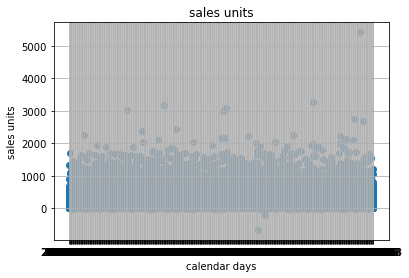

In [49]:
plt.figure(figsize=(6, 4))
plt.scatter(data_train['calendar_day'],y)
plt.title('sales units')
plt.xlabel('calendar days')
plt.ylabel('sales units')
plt.grid(True)
plt.show()

In [50]:
data_daily = data_train.groupby('calendar_day')['sales_units'].sum().reset_index()
data_daily.head()

,calendar_day,sales_units
0,2022-02-07,35628
1,2022-02-08,40406
2,2022-02-09,41870
3,2022-02-10,77386
4,2022-02-11,70272


In [51]:
data_daily.describe()

,sales_units
count,474.000000
mean,56301.381857
std,14057.157703
min,-3.000000
25%,47125.250000
50%,54788.000000
75%,65384.250000
max,117433.000000


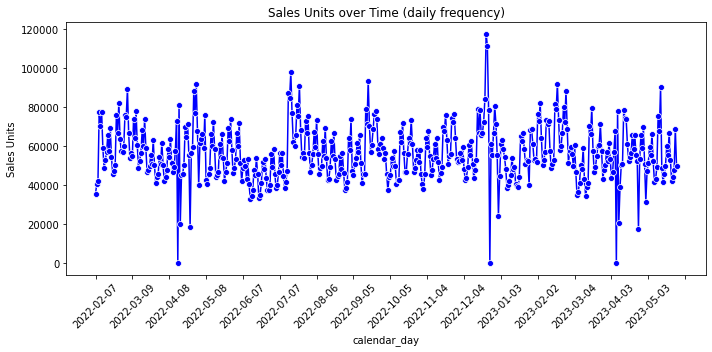

In [52]:
# Frequency of sales units
plt.figure(figsize=(10, 5))
sns.lineplot(x='calendar_day', y='sales_units', data=data_daily, marker='o', color='blue')
plt.title('Sales Units over Time (daily frequency)')
plt.xlabel('calendar_day')
plt.ylabel('Sales Units')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20)) 
plt.show()

In [53]:
# dataset with Weekly frequency
data_train['calendar_day'] = pd.to_datetime(data_train['calendar_day'])
data_weekly = data_train.groupby(pd.Grouper(key='calendar_day', freq='W'))['sales_units'].sum().reset_index()
data_weekly.head()

,calendar_day,sales_units
0,2022-02-13,401538
1,2022-02-20,404146
2,2022-02-27,431624
3,2022-03-06,480633
4,2022-03-13,442159


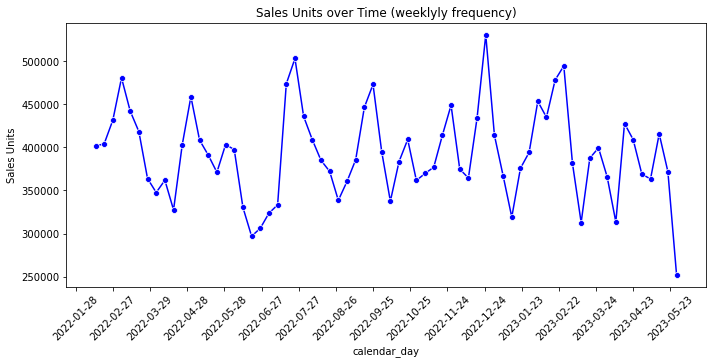

In [54]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='calendar_day', y='sales_units', data=data_weekly, marker='o', color='blue')
plt.title('Sales Units over Time (weeklyly frequency)')
plt.xlabel('calendar_day')
plt.ylabel('Sales Units')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20)) 
plt.show()

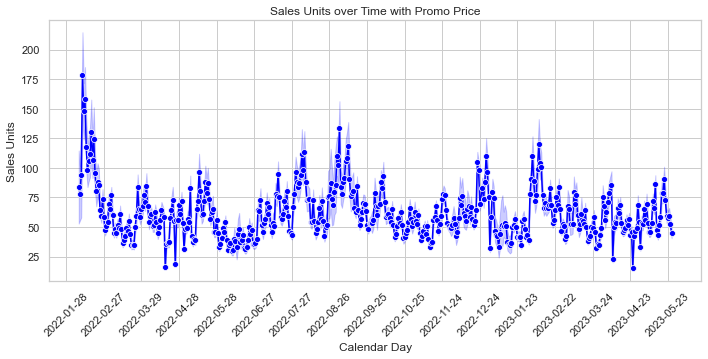

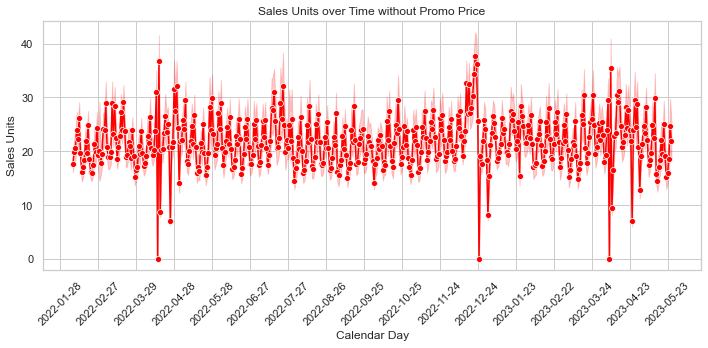

In [55]:
# spliting the dataset through promotion policy
data_with_promo = data_train[~data_train['promo_price'].isna()]
data_without_promo = data_train[data_train['promo_price'].isna()]

#plot to show the effect of promotiom policy:
sns.set(style="whitegrid")


# Plot for data with promo price
plt.figure(figsize=(10, 5))
sns.lineplot(x='calendar_day', y='sales_units', data=data_with_promo, marker='o', color='blue')
plt.title('Sales Units over Time with Promo Price')
plt.xlabel('Calendar Day')
plt.ylabel('Sales Units')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20)) 
plt.show()

# Plot for data without promo price
plt.figure(figsize=(10, 5))
sns.lineplot(x='calendar_day', y='sales_units', data=data_without_promo, marker='o', color='red')
plt.title('Sales Units over Time without Promo Price')
plt.xlabel('Calendar Day')
plt.ylabel('Sales Units')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))
plt.tight_layout()
plt.show()

In [56]:
data_with_promo['sales_units'].mean()

58.954181194996686

In [57]:
data_without_promo['sales_units'].mean()

21.466371496846328

In [58]:
data_train.groupby('category')['sales_units'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Baby Consumables,145903.0,42.681501,77.351531,-9.0,8.0,26.0,51.0,2237.0
Household Cleaning,185978.0,50.439127,102.023872,-5.0,9.0,28.0,54.0,5413.0
Personal Hygiene,214633.0,28.577838,52.239658,-209.0,0.0,13.0,31.0,1292.0
Skin & Sun Care,372632.0,13.270951,26.041054,-661.0,0.0,5.0,15.0,1236.0


In [59]:
data_train.groupby('brandtype')['sales_units'].describe()

,count,mean,std,min,25%,50%,75%,max
brandtype,,,,,,,,
Licensed Brand,1128.0,50.667553,37.342991,0.0,22.0,42.0,69.0,245.0
Manufacturer Brand,35310.0,17.635231,41.902623,-2.0,0.0,7.0,23.0,5413.0
National Brand,864834.0,27.788350,60.246655,-661.0,1.0,12.0,32.0,3284.0
Private Label,17874.0,110.478460,171.320420,-3.0,33.0,59.0,112.0,2237.0


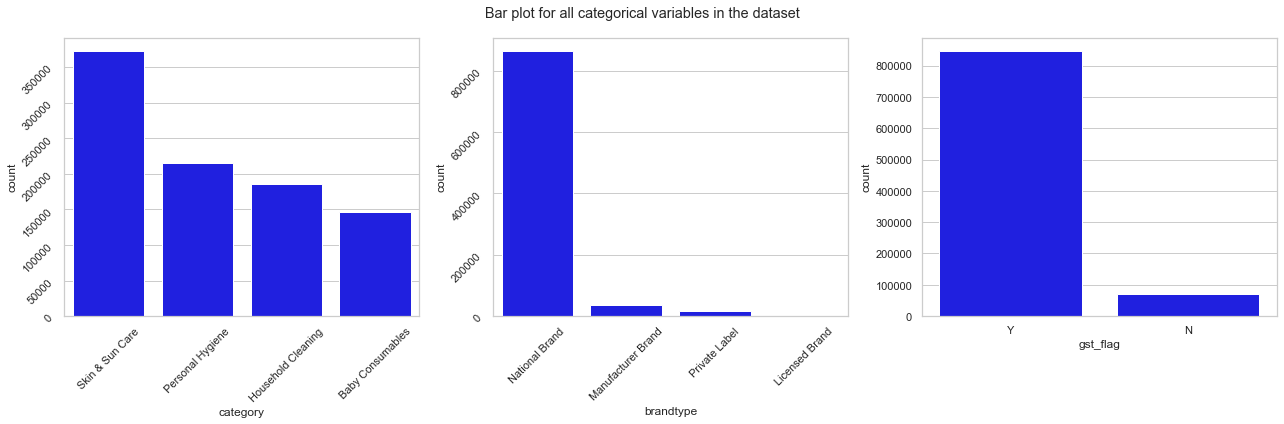

In [60]:
# Bar plots for 3 categorical variables in dataset

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax=axes[0], x='category', data=data_train, color='blue', order=data_train['category'].value_counts().index)
sns.countplot(ax=axes[1], x='brandtype', data=data_train, color='blue', order=data_train['brandtype'].value_counts().index)
sns.countplot(ax=axes[2], x='gst_flag', data=data_train, color='blue', order=data_train['gst_flag'].value_counts().index)

# Rotate x-axis labels for better readability
axes[0].tick_params(labelrotation=45)
axes[1].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()

In [61]:
# Correlation
data_train.corr()['sales_units'].sort_values(ascending=False)

sales_units              1.000000
sales_amount             0.790168
promo_sales              0.642259
promo_unit_per_dollar    0.555676
promo_units              0.551689
gross_profit             0.411810
scanback                 0.360961
article_id               0.149647
sell_price              -0.099802
promo_price             -0.103854
Name: sales_units, dtype: float64

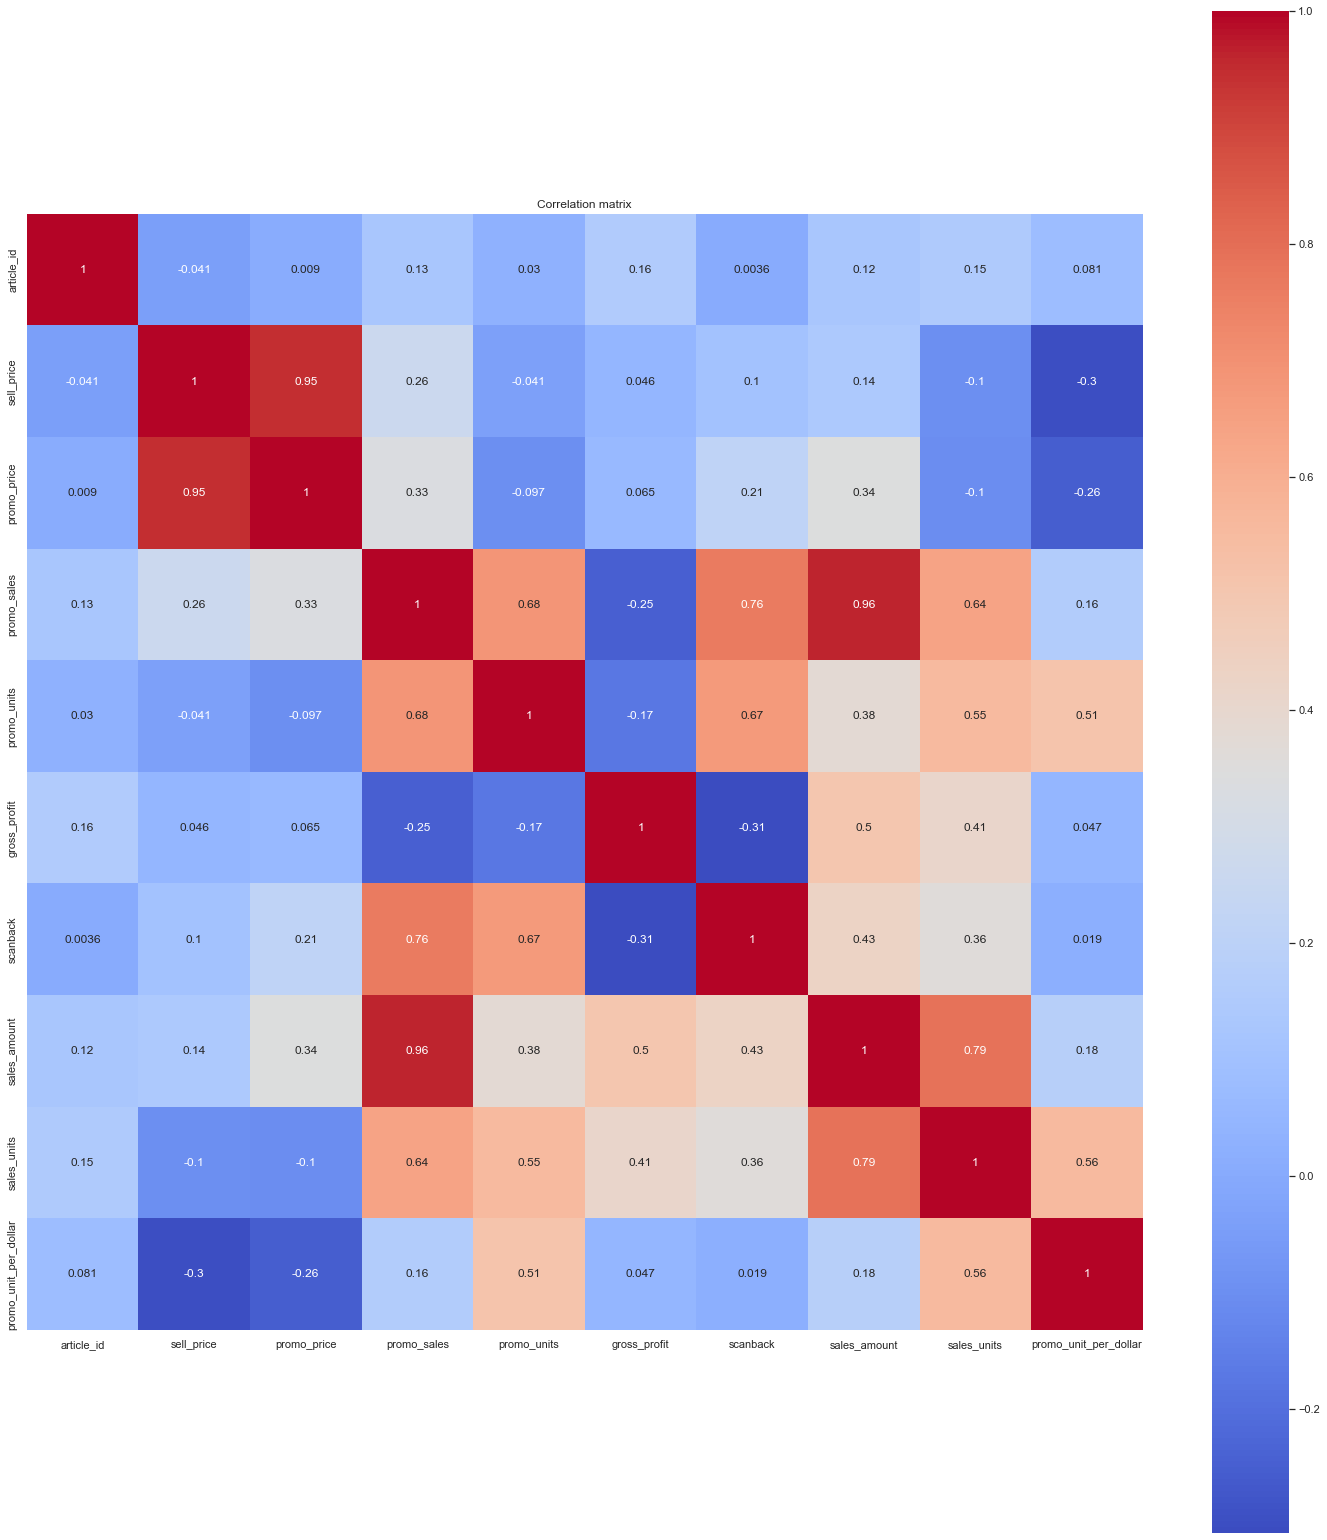

In [62]:
plt.subplots(figsize=(25,28))
sns.heatmap(data_train.corr(),square=True,annot=True,cmap="coolwarm")
plt.title('Correlation matrix')
plt.show()